In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class EquationPart:
    
    def __init__(self):
        self.n_pixels = 256  # amount of pixels by x axis. Количество пикселей по оси x
        self.m_pixels = 256  # amount of pixels by y axis. Количество пикселей по оси y
        self.height = 13  # cone height in micron. Высота конуса в микронах
        self.radius = 4  # cone radius in micron. Радиус конуса в микронах
        self.kx = 0.03125  # pixel size of interfere picture by x axis in micron. Размер пикселя инт. картины по оси x
        self.ky = 0.03125  # pixel size of interfere picture by y axis in micron. Размер пикселя инт. картины по оси y
        self.n0 = 1.4  # refractive index of a medium. Показатель преломления среды
        self.n = 1.6  # refractive index of an object. Показатель преломления объекта
        self.a = 0
        self.b = 0
        self.delta = 100  # propagation difference. Разность хода
        self.lambda0 = 680  # central wavelength in nanometers. Центральная длина волны источника освещения в нм
        self.coh_length = 3000000  # coherent wavelength in nanometers. Длина когерентности для источника монохром-го света
        self.obj_amp = 1  # amplitude of object wave. Амплитуда предметной волны
        self.ref_amp = 1  # amplitude of reference wave. Амлитуда опорной волны
        
        
    # Method of calculation for cone object in immersion medium
    # Метод расчёта объёкта в форме конуса в иммерсионной среде
    def find_cone(self):
        cone_points = np.empty([self.n_pixels, self.m_pixels])
        for x in range(0, self.n_pixels):
            for y in range(0, self.m_pixels):
                p = math.sqrt((x - self.n_pixels / 2) ** 2 + (y - self.m_pixels / 2) ** 2)
                if p > self.radius / self.kx:
                    z = 0
                    cone_points[x, y] = z
                else:
                    disk = 1000 * self.height * (1 - (math.sqrt(
                        ((self.kx * (x - self.n_pixels / 2)) ** 2 + (self.ky * (y - self.m_pixels / 2)) ** 2) / (
                                    self.radius ** 2))))
                    cone_points[x, y] = disk
        return cone_points
    
    # method of calculation for interference pattern
    # метод расчёта интерференционой картины
    def interferogram(self, delta):
        pic_arr = np.empty([self.n_pixels, self.m_pixels])
        cone = self.find_cone()
        for x in range(0, self.n_pixels):
            for y in range(0, self.m_pixels):
                obj_ch = 2 * cone[x, y] * (self.n - self.n0) 
                meas_ch = self.a * y * self.ky + self.b * self.kx + 2 * delta
                obj_ch_phase = (2 * math.pi/self.lambda0) * obj_ch
                meas_ch_phase = (2 * math.pi/self.lambda0) * meas_ch
                coh_func = math.exp(-1 * (obj_ch - meas_ch) ** 2 / (self.coh_length ** 2))
                interfere_pic = self.obj_amp ** 2 + self.ref_amp ** 2 + 2 * self.obj_amp * self.ref_amp * coh_func * math.cos(
                    meas_ch_phase + obj_ch_phase)
                pic_arr[x,y] = interfere_pic
        return pic_arr
    
    # method of calculation for phase distribution of interference pattern
    # метод расчета фазового распределения интерференционной картины
    def distribute_phase(self, i1, i2, i3, i4):
        substract1 = i1 - i3
        substract2 = i4 - i2
        dist_image = np.arctan2(substract2, substract1)
        return dist_image
    
    # phase unwrapping method for distribution of interference pattern
    # метод расчёта развёртки фазового распределения
    def unwrap_phase(self, dist_phase):
        unwrapped = np.unwrap(dist_phase)
        unw_img = (self.lambda0/(4 * math.pi)) * unwrapped
        return unw_img
    
    # method of calculation for optical length difference
    # метод расчёта оптической разности хода
    def find_o_l_d(self, func):
        opt_len_diff = func / (self.n - self.n0)
        return opt_len_diff
    
    # method of calculation for average square deviation
    # метод расчёта для среднеквадратичного отклонения 
    def average_deviation(self, func1, func2):
        sum = 0
        func1 = func1 - np.min(np.min(func1))
        for x in range(0, self.n_pixels):
            for y in range(0, self.m_pixels):
                sum += (func2[x, y] - func1[x, y])**2
        result = math.sqrt((1/(self.n_pixels * self.m_pixels)) * sum)
        return result
   

In [3]:
class PlotPart(EquationPart):
    
    def __init__(self):
        super().__init__()
        self.x_size = np.linspace(0, self.kx * self.n_pixels, self.n_pixels)
        self.y_size = np.linspace(0, self.ky * self.m_pixels, self.m_pixels)
        
    def show_plot(self, obj, title, x_title, y_title):
        plt.plot(obj, 'gray')
        x, labels = plt.xticks()
        plt.xticks(x, np.arange(np.min(self.x_size) - 1, np.max(self.x_size) - 1, 1))
        plt.xlabel(x_title)
        plt.ylabel(y_title)
        plt.title(title)
        plt.show()
        
    def show_img(self, obj, title, x_title, y_title):
        plt.imshow(obj, 'gray')
        x, labels = plt.xticks()
        plt.xticks(x, np.arange(np.min(self.x_size) - 1, np.max(self.x_size) - 1, 1))
        y, labels = plt.yticks()
        plt.yticks(y, np.arange(np.min(self.y_size) - 1, np.max(self.y_size) - 1, 1))
        plt.xlabel(x_title)
        plt.ylabel(y_title)
        plt.title(title)
        plt.show()

In [4]:
math_inst = EquationPart()
plot_inst = PlotPart()

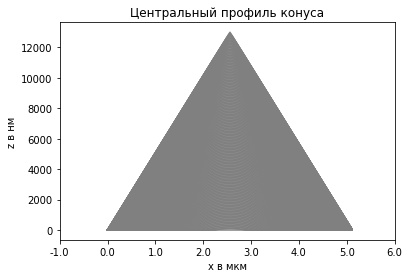

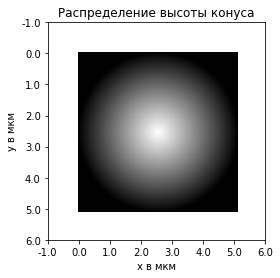

In [5]:
cone_points = math_inst.find_cone()
plot_inst.show_plot(obj = cone_points, 
                    title = 'Центральный профиль конуса',
                    x_title = 'x в мкм', 
                    y_title = 'z в нм')
plot_inst.show_img(obj = cone_points, 
                   title = 'Распределение высоты конуса',
                    x_title = 'x в мкм', 
                    y_title = 'y в мкм')

In [6]:
delta = math_inst.delta

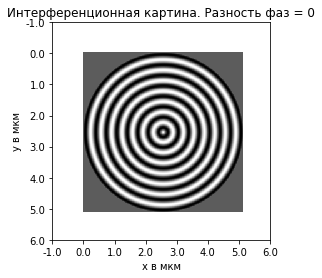

In [7]:
i1 = math_inst.interferogram(delta=delta)
plot_inst.show_img(obj = i1, 
                   title = 'Интерференционная картина. Разность фаз = 0',
                   x_title = 'x в мкм', 
                   y_title = 'y в мкм')

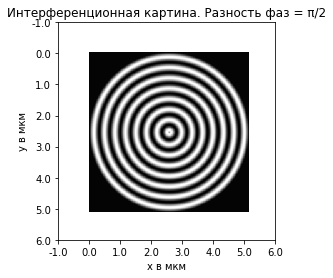

In [8]:
i2 = math_inst.interferogram(delta=delta + math_inst.lambda0 / 8)
plot_inst.show_img(obj = i2, 
                   title = 'Интерференционная картина. Разность фаз = π/2',
                   x_title = 'x в мкм', 
                   y_title = 'y в мкм')

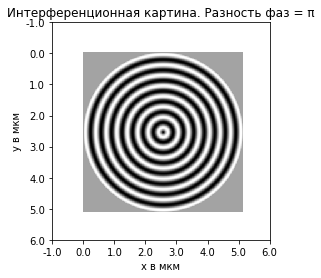

In [9]:
i3 = math_inst.interferogram(delta=delta + math_inst.lambda0 / 4)
plot_inst.show_img(obj = i3, 
                   title = 'Интерференционная картина. Разность фаз = π',
                   x_title = 'x в мкм', 
                   y_title = 'y в мкм')

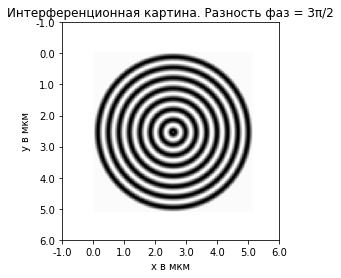

In [10]:
i4 = math_inst.interferogram(delta=delta + 3 * math_inst.lambda0 / 8)
plot_inst.show_img(obj = i4, 
                   title = 'Интерференционная картина. Разность фаз = 3π/2',
                   x_title = 'x в мкм', 
                   y_title = 'y в мкм')

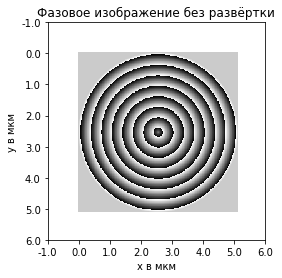

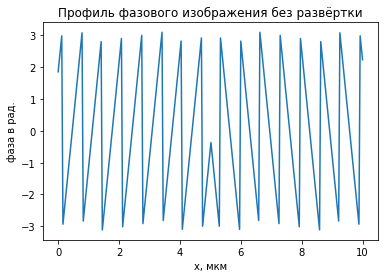

In [11]:
phase_img = math_inst.distribute_phase(i1, i2, i3, i4)
plot_inst.show_img(obj = phase_img, 
                   title = 'Фазовое изображение без развёртки',
                   x_title = 'x в мкм', 
                   y_title = 'y в мкм')
plt.plot(np.linspace(0, 10, 256),phase_img[:,128])
plt.title('Профиль фазового изображения без развёртки')
plt.xlabel('x, мкм')
plt.ylabel('фаза в рад.')
plt.show()

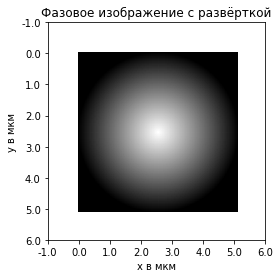

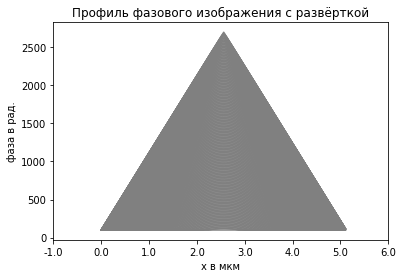

In [12]:
unwrapped = math_inst.unwrap_phase(phase_img)
plot_inst.show_img(obj = unwrapped, 
                   title = 'Фазовое изображение c развёрткой',
                   x_title = 'x в мкм', 
                   y_title = 'y в мкм')
plot_inst.show_plot(obj = unwrapped, 
                    title = 'Профиль фазового изображения с развёрткой',
                    x_title = 'x в мкм', 
                    y_title = 'фаза в рад.')

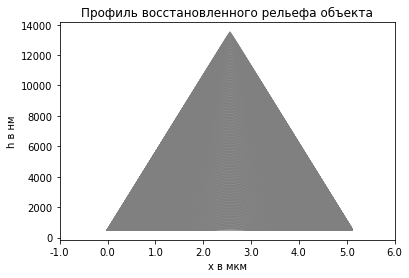

In [13]:
opt = math_inst.find_o_l_d(unwrapped)
plot_inst.show_plot(obj = opt, 
                    title = 'Профиль восстановленного рельефа объекта',
                    x_title = 'x в мкм', 
                    y_title = 'h в нм')

In [14]:
average_deviation = math_inst.average_deviation(opt, cone_points)
print('{0:.10f}'.format(average_deviation))

0.0000057682
